In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import openslide
from openslide import open_slide
import large_image

In [2]:
# Get path to raw data 
main_directory = os.path.dirname(os.getcwd())
os.chdir(main_directory + '/data/raw/svs_files')
svs_data_directory = os.getcwd()
svs_files = os.listdir(svs_data_directory)

In [12]:
# Load in .svs file (using open_slide)
svs_file = svs_files[0]
slide = open_slide(svs_file)

In [44]:
# Get slide dimensions as (width, height)
[width, height] = slide.dimensions
print(f"Image width: {width} \nImage height: {height}")

slide_props = slide.properties
print(slide_props)

print(f"Case ID: {slide_props['aperio.Filename']}")
print("Pixel size of X in µm is:", slide_props['openslide.mpp-x'])
print("Pixel size of Y in µm is:", slide_props['openslide.mpp-y'])

Image width: 134231 
Image height: 93580
<_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'resc3-dsr2', 'aperio.Date': '01/10/11', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': 'TCGA-A2-A0SY-01Z-00-DX1', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '45922', 'aperio.Left': '19.192802', 'aperio.LineAreaXOffset': '0.003267', 'aperio.LineAreaYOffset': '-0.003095', 'aperio.LineCameraSkew': '0.001071', 'aperio.MPP': '0.2480', 'aperio.OriginalHeight': '93680', 'aperio.OriginalWidth': '139872', 'aperio.Parmset': 'GOG136 on RESBPCLACIE01', 'aperio.ScanScope ID': 'SS1511CNTLR', 'aperio.StripeWidth': '992', 'aperio.Time': '17:29:52', 'aperio.Title': 'TCGA-A2-A0SY-01Z-00-DX1', 'aperio.Top': '24.750303', 'aperio.User': '23e59d7b-628e-431d-adef-2a40a2ce126e', 'openslide.comment': 'Aperio Image Library v10.2.24\r\n139872x93680 [0,100 134231x93580] (240x240) JPEG/RGB Q=30|AppMag = 4

Each level is downsampled by an amount of:  (1.0, 4.00004470006258, 16.001443204809114, 64.00958799196559)


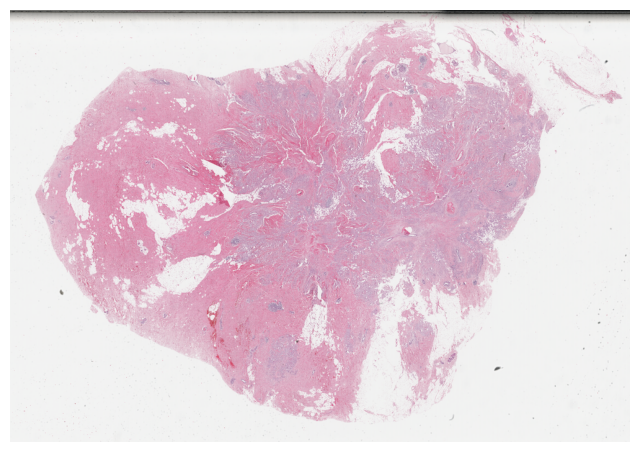

In [5]:
# Get a thumbnail of the image and visualise
slide_thumb_1000 = slide.get_thumbnail(size=(1000, 1000))

# Convert thumbnail to numpy array
slide_thumb_1000_np = np.array(slide_thumb_1000)
plt.figure(figsize=(8,8))
plt.imshow(slide_thumb_1000_np)    
plt.axis('off')

# By how much are levels downsampled from the original image?
factors = slide.level_downsamples
print("Each level is downsampled by an amount of: ", factors)

In [22]:
dims = slide.level_dimensions

num_levels = len(dims)
print("Number of levels in this image are:", num_levels)

Number of levels in this image are: 4


Text(0.5, 0.632, 'Magnification: 40x')

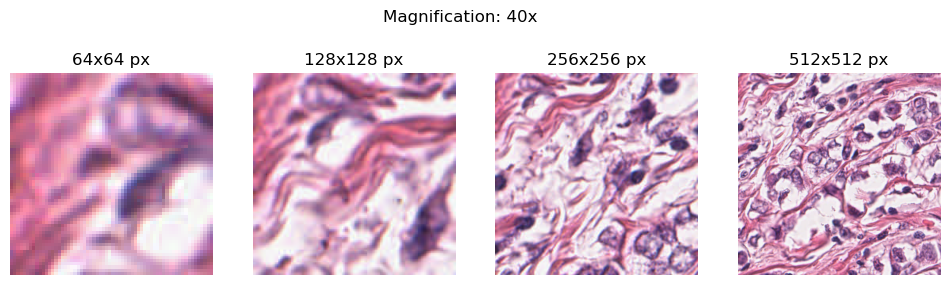

In [26]:
# Extract regions with top left pixel at (50000, 50000) and of different region sizes
tile64 = slide.read_region((50000,50000), 0, (64,64))
tile128 = slide.read_region((50000,50000), 0, (128,128))
tile256 = slide.read_region((50000,50000), 0, (256,256))
tile512 = slide.read_region((50000,50000), 0, (512,512))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,12))
ax1.imshow(tile64); ax1.axis('off'); ax1.set_title("64x64 px")
ax2.imshow(tile128); ax2.axis('off'); ax2.set_title("128x128 px")
ax3.imshow(tile256); ax3.axis('off'); ax3.set_title("256x256 px")
ax4.imshow(tile512); ax4.axis('off'); ax4.set_title("512x512 px")
fig.suptitle("Magnification: " + str(40) + "x", y=0.632)

Text(0.5, 0.632, 'Magnification: 10x')

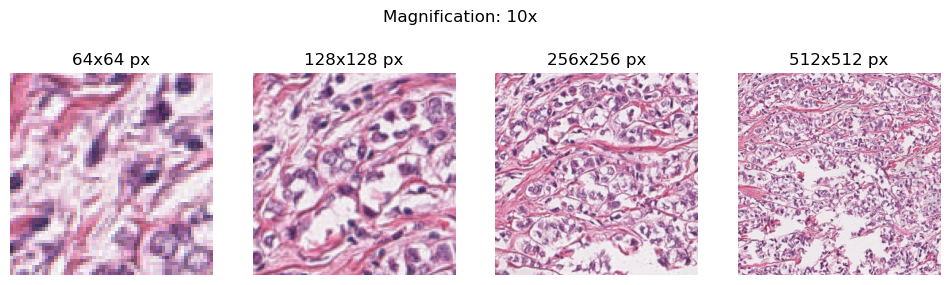

In [28]:
# Extract regions with top left pixel at (50000, 50000) and of different region sizes
tile64 = slide.read_region((50000,50000), 1, (64,64))
tile128 = slide.read_region((50000,50000), 1, (128,128))
tile256 = slide.read_region((50000,50000), 1, (256,256))
tile512 = slide.read_region((50000,50000), 1, (512,512))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,12))
ax1.imshow(tile64); ax1.axis('off'); ax1.set_title("64x64 px")
ax2.imshow(tile128); ax2.axis('off'); ax2.set_title("128x128 px")
ax3.imshow(tile256); ax3.axis('off'); ax3.set_title("256x256 px")
ax4.imshow(tile512); ax4.axis('off'); ax4.set_title("512x512 px")
fig.suptitle("Magnification: " + str(10) + "x", y=0.632)

Text(0.5, 0.632, 'Magnification: 2.5x')

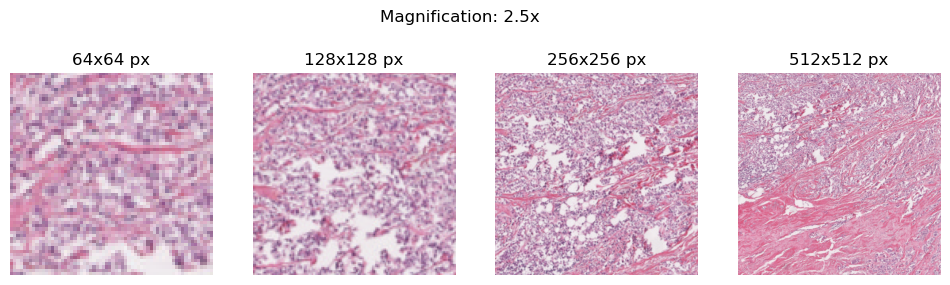

In [29]:
# Extract regions with top left pixel at (50000, 50000) and of different region sizes
tile64 = slide.read_region((50000,50000), 2, (64,64))
tile128 = slide.read_region((50000,50000), 2, (128,128))
tile256 = slide.read_region((50000,50000), 2, (256,256))
tile512 = slide.read_region((50000,50000), 2, (512,512))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,12))
ax1.imshow(tile64); ax1.axis('off'); ax1.set_title("64x64 px")
ax2.imshow(tile128); ax2.axis('off'); ax2.set_title("128x128 px")
ax3.imshow(tile256); ax3.axis('off'); ax3.set_title("256x256 px")
ax4.imshow(tile512); ax4.axis('off'); ax4.set_title("512x512 px")
fig.suptitle("Magnification: " + str(2.5) + "x", y=0.632)

Text(0.5, 1.0, '10X upsized to 256')

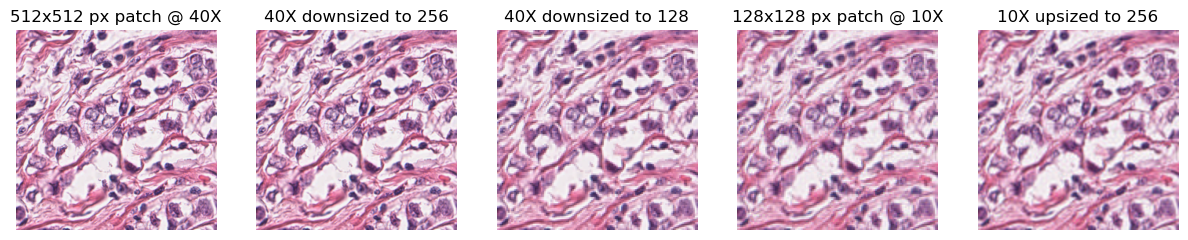

In [43]:
tile40x = slide.read_region((50000,50000), 0, (512,512))
tile10x = slide.read_region((50000,50000), 1, (128,128))

# Resize larger tile to a smaller image
downsized256 = tile40x.resize([256, 256])
downsized128 = tile40x.resize([128, 128])
upsized256 = tile10x.resize([256, 256])

# Compare extracted patches
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,165))
ax1.imshow(tile40x); ax1.axis('off'); ax1.set_title("512x512 px patch @ 40X")
ax2.imshow(downsized256); ax2.axis('off'); ax2.set_title("40X downsized to 256")
ax3.imshow(downsized128); ax3.axis('off'); ax3.set_title("40X downsized to 128")
ax4.imshow(tile10x); ax4.axis('off'); ax4.set_title("128x128 px patch @ 10X")
ax5.imshow(upsized256); ax5.axis('off'); ax5.set_title("10X upsized to 256")


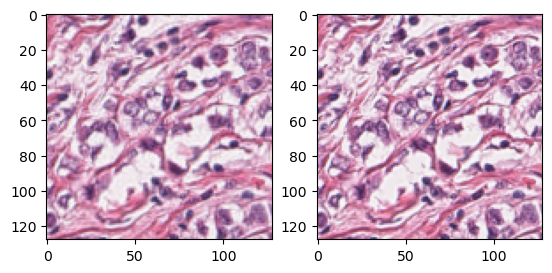

In [40]:
d = tile40x.resize([128, 128])
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(tile10x)
ax2.imshow(d)

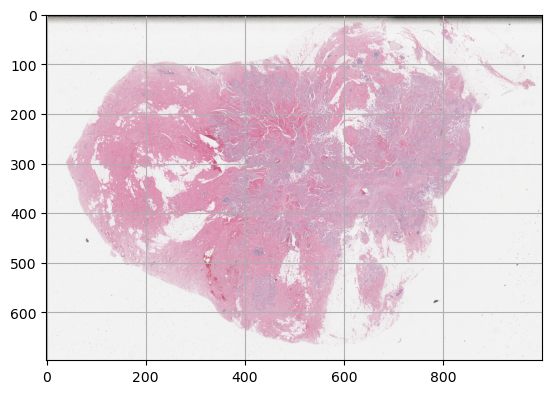

In [45]:
# Work on visualising grid over original image ...
plt.imshow(slide.get_thumbnail(size=(1000, 1000)))
plt.grid()

In [108]:
def visualise_grid(slide, gridLineWidth, level):
    
    # Extract image dimensions at specified level
    h = int(slide_props['openslide.level[' + str(level) + '].height'])
    w = int(slide_props['openslide.level[' + str(level) + '].width'])
    # Extract whole image at specified level
    level_img = slide.read_region((0,0), level, (w, h))

    # Define grid
    grid = np.zeros([h, w]); grid_img = np.array(level_img)[:, :, :3]
    num_horz_lines = h//gridLineWidth; num_vert_lines = w//gridLineWidth
    # Draw vertical lines on grid
    for i in range(1, num_vert_lines+1):
        line = i*gridLineWidth
        if line <= w: grid[:, line] = 1
    # Draw horizontal lines on grid
    for j in range(1, num_horz_lines+1):
        line = j*gridLineWidth
        if line <= h: grid[line, :] = 1

    # Draw grid onto image
    for i in range(h):
        for j in range(w):
            if grid[i][j] == 1:
                grid_img[i][j][:] = [0, 0, 0]
    plt.imshow(grid_img)

1462 2097


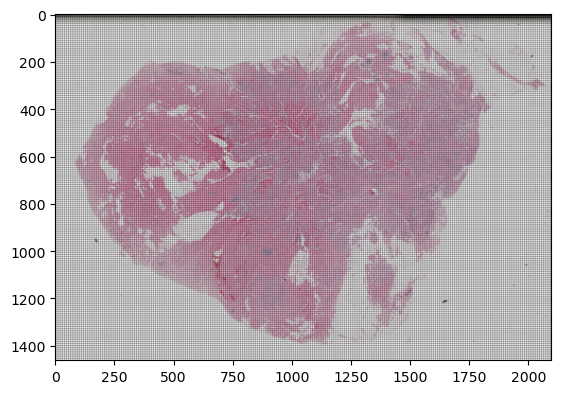

In [109]:
visualise_grid(slide, 8, level=3)